# **Analysis of Film Industry ROIs**
## Malcolm Katzenbach, Lauren Phipps, Dan Valenzuela

***



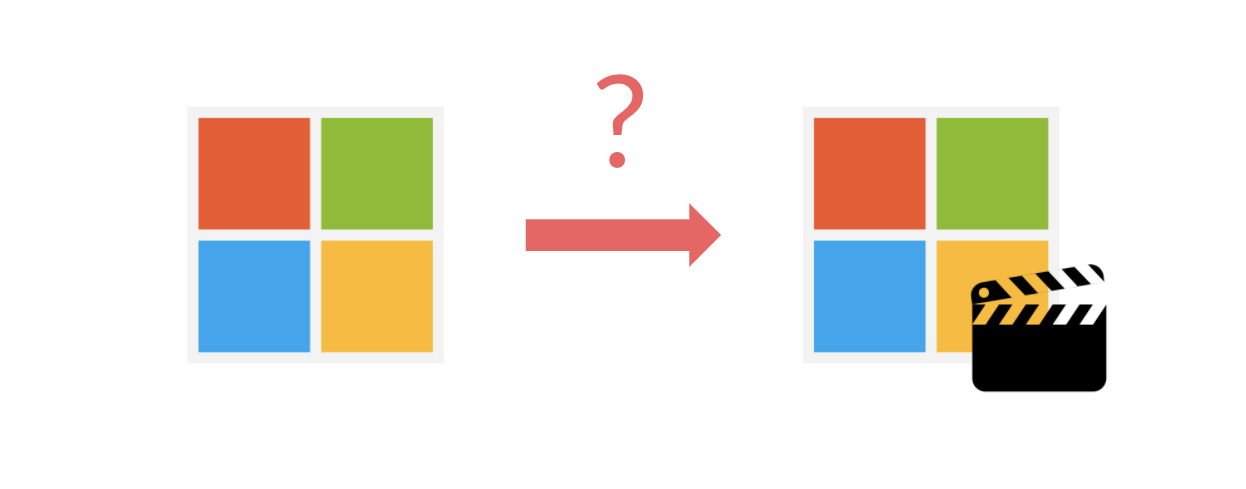
## **Overview** <a id="Overview"></a>

This project analyzes the budgets and returns on investment for movies ranging from 2010-2019. Using data from the [Internet Movie Database](https://www.imdb.com/) and [The-Numbers.com](https://www.the-numbers.com/), the movies were broken down into genre and budget categories to determine any trends in returns on investment. This information will be used to help Microsoft's new movie studio maximize their success by selecting genres and budget tiers that will yield the highest return on their investment.

[**1. Business Problem**](#Business-Problem)

[**2. Data Understanding**](#Data-Understanding)

[**3. Data Preparation**](#Data-Preparation)

[**4. Data Analysis**](#Data-Analysis)

[**5. Evaluation**](#Evaluation)

[**6. Conclusion**](#Conclusion)
***

## **Business Problem** <a id="Business-Understanding"></a>
[*↑ Back to overview*](#Overview)

Many large companies have started to venture into creating original video content. Seeing the potential and wanting to be able to compete with other companies, Microsoft has created a new movie studio. In an effort to be as successful as possible, research must be done into the movie industry to determine what conditions will yield the highest return on investment (ROI). Microsoft's goal is to maximize their return on investment for the movies they create. 

The business questions that will be addressed are:

  1. [What is the relationship between a film's budget and it's return on investment?](#Question-1)

  2. [What is the distribution of returns on investment for budget tiers for films?](#Question-2)

  3. [What is the distribution of returns on investment for movie genres?](#Question-3)

  4. [Which budget tier for each genre will yield the highest median return on investment?](#Question-4)

[*↑ Back to overview*](#Overview)
***

## **Data Understanding** <a id="Data-Understanding"></a>
[*↑ Back to overview*](#Overview)

### Datasets
For the purposes of this analysis we focused primarily on data from the Internet Movie Database (IMDB) and The-Numbers.com (TN), two sources that focus on the film industry. Specifically we used datasets that included--on one hand--title, date released, and genre data and--on the other hand--title, date released, production budgets, and box office figures. Below is a summary of the data pertinent to our analysis broken down by file. 

| imdb.title.basics.csv | tn.movie_budgets.csv |
| --- | --- |
| primary_title | movie |
| start_year | release_date |
| genres |  |
|  | production_budget |
|  | domestic_gross |
|  | worldwide_gross |


In this table you can see how data between the two datasets can "match" in the sense that they provide they same kind of data. However, the data may be in different formats. For example, `start_year` in `imdb.title.basics.csv` is  formatted as `YYYY` whereas `release_date` in `tn.movie_budgets.csv` is formatted as `MMM DD, YYYY`. You can see below examples of such a discrepancy.

In [1]:
import CustomLibrary as cl
from CustomLibrary import df_title_basics, df_movie_budgets

df_title_basics.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [2]:
df_movie_budgets.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


Further, there are issues with being able to utilize the data due to their data types. The previously discussed `release_date` and `start_year` data are actually `objects` and `integers`, respectively. Additionally, much of the box office data are `objects` that can't be added and subtraced. How we dealt with them can be seen in the [Data Preparation](#Data-Preparation) section.

In [3]:
cl.df_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
imdb.title.basics.csv
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
tn.movie_budgets.csv
 None


### Key Data for Merging Datasets and Analysis <a id="Key-Data" ></a>

Another key issue for this data is identifying which data we can use to perform a merge. Although the `imdb.title.basics.csv` contains a unique identifier column `tconst` the `tn.movie_budgets.csv` dataset contains no unique IDs. We worked around that issue by identifying the title variables `primary_title` and `movie` and release date variables `start_year`and `release_date` variables as our keys. As mentioned before these variables did not match in terms of format so, for example, we identified the year string in `release_date` as data that will be used to match release date variables. As one will see later, the ranges of time will change once the data is merged. For now, note that the IMDB data dates back to 2010 and The-Numbers data dates back to 1975.



Although the datasets contain key variables as `genres`, `production_budget`, and `worldwide_gross`, the datasets also lack total costs of producing each movie, including costs like marketing, and more granular genre data. As seen in [Data Preparation](#Data-Preparation), we made key assumptions, calculations, and manipulations to make the dataframe accessible for our analysis of ROI, genre, and budgets. 

[*↑ Back to overview*](#Overview)
***

## **Data Preparation** <a id="Data-Preparation"></a>
[*↑ Back to overview*](#Overview)

### Merging Data

In order to begin the analysis on the collected data, a few operations need to be performed. The most important operation being the addition of a `start_year` column to the TN data so that both the IMDB and TN datasets can be merged using the same data. By creating a new interger column by sliciing `release_date`, a merged dataset is possible to make based on movie title (`movie`) and `start_year`. Merging on both title and date prevents erroneous data arising from remakes or different movies with the same title.




In [4]:
prepped_Data = cl.prep_Data(df_title_basics, df_movie_budgets)
prepped_Data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,tconst,original_title,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy"
1,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,tt6565702,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi"
2,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,tt2395427,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi"
3,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,tt4154756,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi"
4,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,tt0974015,Justice League,120.0,"Action,Adventure,Fantasy"


In [5]:
cl.df_time_counts(prepped_Data)

Rows: 1547
 Oldest movie: 2010
 Newest movie: 2020


The results aboveshow that (1) the time range of the data shortened to IMDB's date range and (2) the merge dropped a number of movies. Both results are readily apparent by viewing the differences in time ranges and data counts between the datasets shown below. In merging the datasets, you can see that the first result above comes from the "newest" oldest  and the "oldest" newest movie among the data sets.


In [6]:
cl.df_time_counts(df_title_basics)
cl.df_time_counts(df_movie_budgets)

Rows: 146144
 Oldest movie: 2010
 Newest movie: 2115
Rows: 5782
 Oldest movie: 1915
 Newest movie: 2020


The second result can be explained by the possible differences in titles or years between datasets for the same movie. The number of differences between datasets in these key respects were not investigated as we found that the cleaned data shown in [Cleaning Data](#Cleaning-Data) was sufficient for our analysis.

### Cleaning Data <a id="Cleaning-Data"></a>

After merging the data, key cleaning operations included removing duplicates, dropping any movies without `worldwide_gross` data,  calculating `ROI`, parsing out `genre` data, converting revenue data into integers for analysis, and categorizing budgets.

The more basic operations can be summed up quickly: duplicates were removed by searching for duplicate `movie` values; movies with \\$0  or `NaN` gross data were dropped since without such data ROI can't be calculated; and the revenue data needed to be stripped of \\$'s and commas and converted for ROI calculations.

In order to look at the relationship between movie budgets and return on investment, the movies were put into three categories: low budget, mid-range budget, and high budget. These categories were determined first by looking at the distribution of the total cost data for the data set. The 25% quartile was approximately 20 million, so that was assigned the low budget. The 75% quartile was 100 million, so all budgets over that was assigned to high budget. Any movie that cost between 20 million and 100 million was classified as a mid-range budget. When looking at the number of movies assigned to each category, the low budget was changed to movies under 25 million to create a more even distribution of movies in each category. A new column `budget_category` was added to the data frame to denote their budget classication. 

In order to analyze the relationship between ROI and genres, `genre` data also needed to be parsed out. Before parsing, the `genre` column contained strings which could contain up to three genre tags separated by commas. Although an analysis could be performed on every possible combination of genre, this analysis decided to parse out the data into categories that indicate whether a film has a certain genre tag given the large number of possible of combinations. 

For example, `Avengers: Infinity War` had `Action,Adventure,Sci-Fi` as its genre. Our code generated new indicator variables to indicate whether a certain set of genres were present in the `genre` column. In this case the Action, Adventure, and Sci-Fi indicator columns showed `1` to indicate that those genres were present in that movie. This analysis found that Action, Adventure, Comedy, Drama, Family, Thriller, and Documentary encompassed a large majority of the films in the merged dataset. 

Finally, `ROI` was calculated by dividing `profit` by `total_costs`. `total_costs` was generated by adding `production_budget` and a new column `advertisement_budget` which includes assumed data on how much additional investment was needed to market the films. This analysis assumes that the marketing investment amount is the same as the production investment amount. `profit` was generated by subtracting `total_costs` from `worldwide_gross`. 

In [7]:
clean_df = cl.clean_Data(prepped_Data)
print(f'Rows: {clean_df.shape[0]}\n', f'Oldest movie: {clean_df.start_year.min()}\n', f'Newest movie: {clean_df.start_year.max()}')
clean_df.head()

Rows: 1365
 Oldest movie: 2010
 Newest movie: 2019


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,start_year,tconst,original_title,runtime_minutes,...,genres_Action_id,genres_Adventure_id,genres_Comedy_id,genres_Drama_id,genres_Family_id,genres_Thriller_id,genres_Documentary_id,genres_tuple,genres_num_of_parses,budget_category
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,2018,tt4154756,Avengers: Infinity War,149,...,1,1,0,0,0,0,0,"(1, 1, 0, 0, 0, 0, 0)",2,high
23,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,2015,tt0369610,Jurassic World,124,...,1,1,0,0,0,0,0,"(1, 1, 0, 0, 0, 0, 0)",2,high
46,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,2015,tt2820852,Furious Seven,137,...,1,0,0,0,0,1,0,"(1, 0, 0, 0, 0, 1, 0)",2,high
18,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,2012,tt0848228,The Avengers,143,...,1,1,0,0,0,0,0,"(1, 1, 0, 0, 0, 0, 0)",2,high
301,73,"Jul 10, 2015",Minions,74000000,336045770,1160336173,2015,tt2293640,Minions,91,...,0,1,1,0,0,0,0,"(0, 1, 1, 0, 0, 0, 0)",2,high


[*↑ Back to overview*](#Overview)
***

## **Data Analysis** <a id="Data-Analysis"></a>
[*↑ Back to overview*](#Overview)

### Question 1 - <a id="Question-1"></a>What is the relationship between a film's budget and it's return on investment?

The first step in the analysis was to determine if there is a correlation between the amount of money invested in a movie and the return on investment. This will help decide if it is more beneficial to invest in larger, blockbuster movies or if there is more return for smaller, low-budget films. A scatterplot was created with the film's budget (production and advertisement costs) on the x-axis and the return on investment as a percentage on the y-axis. This was then further broken down by the low, mid, and high budget classification to more clearly show the divide between the budgets.

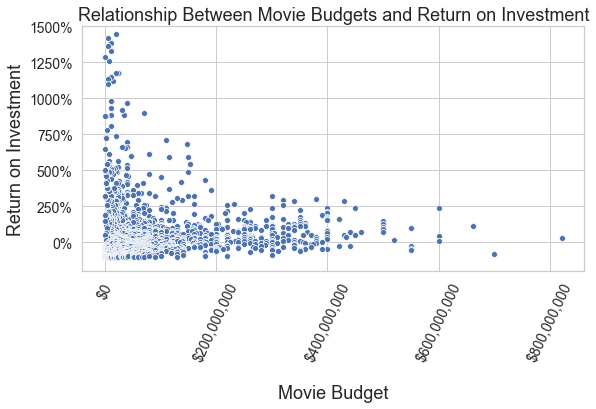

In [8]:
cl.budget_ROI_scatter(clean_df)

This plot shows that there is no strong correlation between a film's budget and its return on investment. The correlation coefficient is -0.05, again confirming no correlation. Generally, more money invested in a film does not automatically lead to a higher return on that investment. This was then broken down into three categories: low, mid, and high budgets.

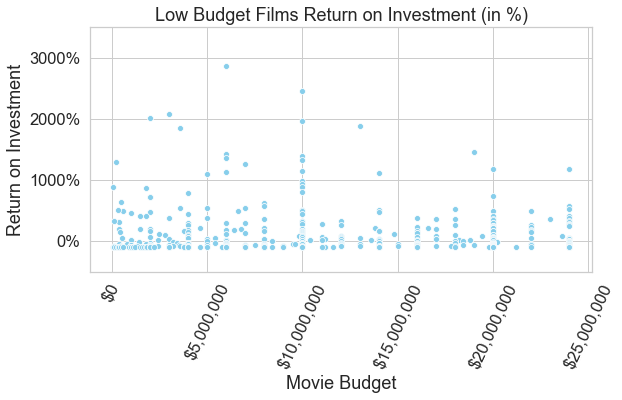

In [9]:
cl.LB_ROI_scatter(clean_df)

As the plot above shows, there is no correlation between movie budget and return on investment for low budget films (movies with budgets under $ 25 million). The correlation coefficient was approximately -0.1. 

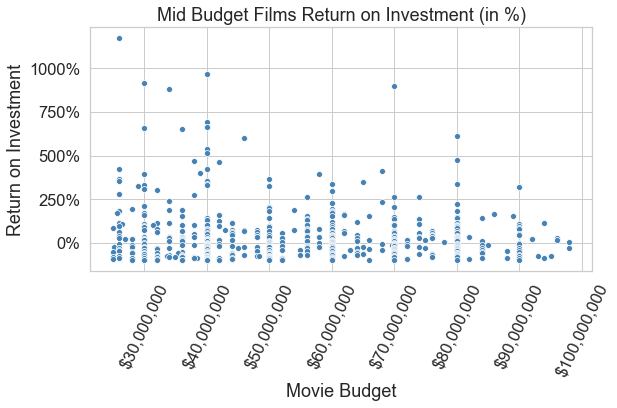

In [10]:
cl.MB_ROI_scatter(clean_df)

As the plot above shows, there is no correlation between movie budget and return on investment for mid-range budget films (movies with budgets between 25 million and 100 million dollars). The correlation coefficient was approximately -0.1.

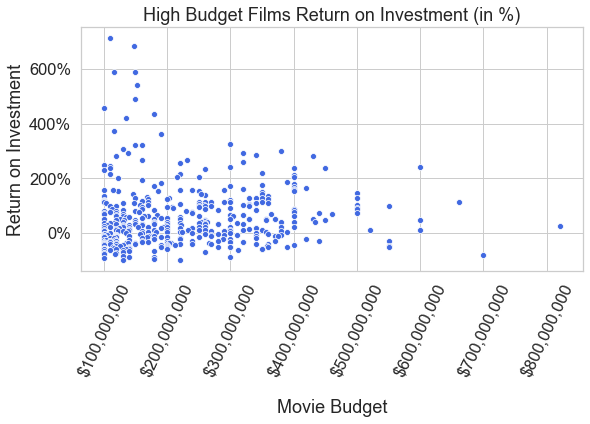

In [11]:
cl.HB_ROI_scatter(clean_df)

As the plot above shows, there is no correlation between movie budget and return on investment for low budget films (movies with budgets over $100 million). The correlation coefficient was approximately 0.05. 

A movie's budget alone does not affect it's return on investment. 

### Question 2 - What is the distribution of ROI by budget tiers? <a id="Question-2"></a>

The next step was to look more closely at the distribution of ROI's for the films in each budget tier to determine the median value and look for trends. A boxplot was used to look at the characteristics of each budget tier. Outliers are not shown in this plot, but are still part of the data. Their impact can be seen from the range of the whiskers. Due to these outliers, the median value was used as a measure of the central tendency of the data.  The median is represented by the green line. 

/Users/danielvalenzuela/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


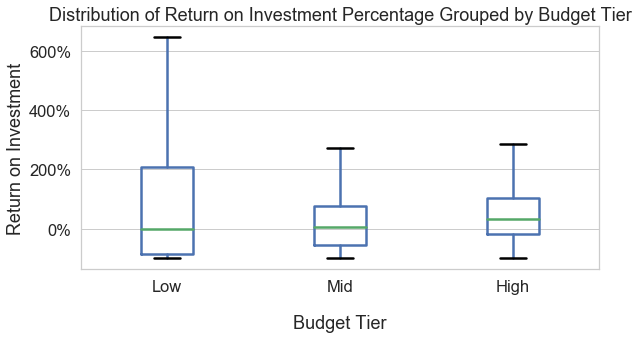

In [12]:
cl.ROI_budget_boxplot(clean_df)

This graph shows that the median is highest for high budget films and that only a small percentage of those movies have a negative ROI and would lose money. They are the safest investment to get a positive ROI. Low budget films do have the highest portion of movies that will lose money but, at the same time, have the highest range of positive ROI's. The upper end of the box denotes the 75th percentile and that is at 200%, while the whiskers denoting the 90th percentile is significantly higher at over 600% return. This shows that there is potential to get a very high return on an investment in a low budget film. 

### Question 3 - <a id="Question-3"></a> What is the distribution of the returns on investment for each movie genre?

When investing in movies, it is important to know if some genres lead to a higher return on investment than others. To answer this question, the data was broken into 7 genres. These were the most common genres contained in the data set. Some movies were categorized as more than one genre. Those movies are included in each of the listed genres. For example, if a movie is considered Action and Adventure, it's data in included in both genres because it is representative of both genres. The final category is "other" for any movies that did not fall into one of the seven listed genres or did not specify a genre. Only 25 movies were included in this category.

Because there is a wide range of values for returns on investment, it is beneficial to use a boxplot to get a more complete look at the data for each genre. Outliers are not shown on this plot, but are still part of the data. Their impact can be seen from the range of the whiskers. The median is represented by the red line. Because of the significant outliers, the median is a better representation of the data than the mean.

/Users/danielvalenzuela/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


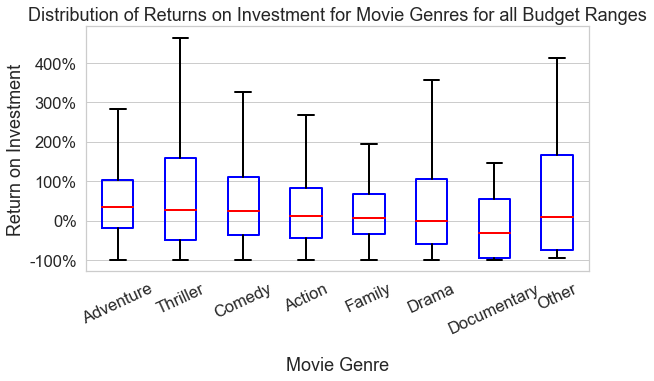

In [13]:
genre_dfs = cl.create_genre_dfs(clean_df)
cl.genre_boxplot(genre_dfs, 'ROI')

With the exception of documentaries, all genres have a positive median return on investment, meaning more than half of the movies in each of those genres will make a profit. Adventure and thriller movies have the highest median ROI. Overall, adventure films are the most likely to have a positive ROI, which is shown by having the highest amount of their box and top whisker above 0%. However, thriller movies have the highest range of positive ROI's, with its 90th percentile (shown as the top whisker) reaching over 400%. This shows that thriller movies do have the potential to be highest return on an investment. 

### Question 4 - Which budget tier for each genre will yield the highest median return on investment?<a id="Question-4"></a> 

As a final step, it was beneficial to use the budget tiers from Questions [1](#Question-1) and [2](#Question-2) to further analyze the specific genres of films to determine if certain genres with specific budgets created more successful films. Below are plots of median ROI for each genre categorized by budget tiers. Due to previously mentioned outliers, the median value was used as a measure of the central tendency of the data. The median is represented by the bars.

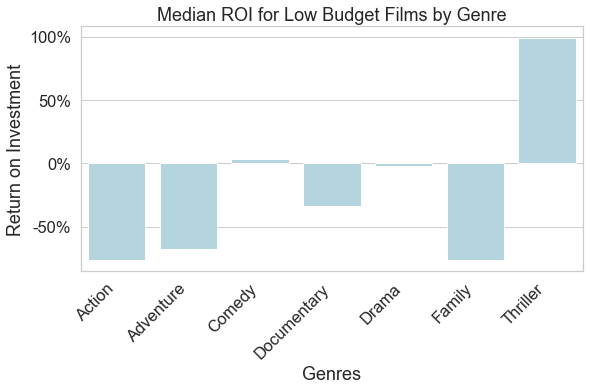

In [14]:
lb_genre_df = cl.Low_Budget_Genres(clean_df)
cl.LB_Genres_Graph(lb_genre_df)

This graph shows that, for low budget films, most genres do not have a positive median ROI. The exception is for low-budget thriller films. These yield a median ROI of 100%, which corresponds with doubling the initial investment in the film. 

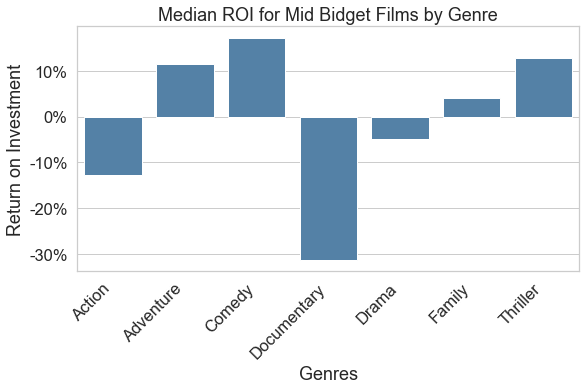

In [15]:
mb_genre_df = cl.Mid_Budget_Genres(clean_df)
cl.MB_Genres_Graph(mb_genre_df)

Adventure, comedy, and thriller movies with a mid-range budget have a modestly positive median ROI, with values ranging from 10-20% ROI. Documentaries with a mid-range budget yielded the lowest median ROI at -30%, showing that most lost money. 

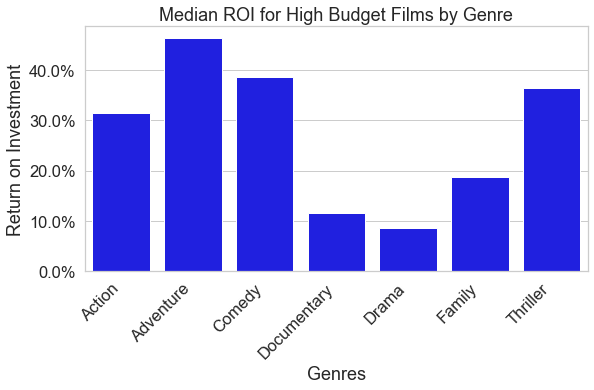

In [16]:
hb_genre_df = cl.High_Budget_Genres(clean_df)
cl.HB_Genres_Graph(hb_genre_df)

High budget films across all genres yielded a positive ROI, with adventure, comedy, and thriller films yielding the highest. This graph confirms that most films that have a budget of over $100 million will have a positve return on that investment. 

[*↑ Back to overview*](#Overview)
***

## **Evaluation**<a id="Evaluation"></a>
[*↑ Back to overview*](#Overview)

The business problem asked how a new movie studio can be as successful as possible in terms of ROI. By looking more deeply into the data on movies from the past 10 years, the analysis has shown what types of genres have done well with certain sized budgets. This has successfully answered the main question in a basic way. This analysis is helpful as done, however there are certain areas that could bring more accuracy to the analysis. 

- **The Advertisement Cost**: In the analysis, it was assumed that advertisement budget was equal to the production budget. However, it unlikely that all movies had an equal advertisement and production budget. By using more accurate advertisement budgets, the accuracy of the ROI will increase.
- **Time Period of Analysis**: The dataframes were only for movies from the last 10 years. While useful for immediate future movies, having a longer period of data could increase how robust our analysis is and allow us to look a trends over time.
- **Inflation**: This analysis did not account for inflation. While only over a 10 year period, inflation would still have an effect on the money value of older movies. Factoring in inflation would increase the accuracy of the comparison between  movies.
- **Box Office Only**: This data only takes into account box office revenues. If Microsoft desired to go into streaming services and produce movies for the streaming service only, it would be more accurate to include data on streamed movies.

[*↑ Back to overview*](#Overview)
***

## **Conclusion**<a id="Conclusion"></a>
[*↑ Back to overview*](#Overview)

This analysis of ROI across budget tiers and genres brings forward two recommendations:

**Produce high budget adventure films-** If the studio has a high production and advertisement budget, the studio should invest in an adventure film since it had the highest median ROI for high budget films.

**Produce low budget thrillers-** If the studio has a low production and advertisement budget, the studio should invest in thrillers since they have the highest possible ROI of any genre film with low budgets. 

[*↑ Back to overview*](#Overview)
***

## **Next Steps**
[*↑ Back to overview*](#Overview)

Based on our evaluation and conclusion, there are multiple paths for further analysis. We suggest the following three possible avenues:

**Evaluating personnel that maximize ROI-** By analyzing the personnel of successful movies in genres such as thrillers and adventures, the studio could attempt to hire those that would most likely help produce a movie with a high ROI.

**Find accurate advertisement budgets for movies and account for inflation-** By going back into the analysis and improving cost data, the accuracy of the ROIs could be increased.

**Constructing Portfolios of Films-** With a given studio budget, a portfolio of films could be maximized for ROI by genre and budget for each.

[*↑ Back to overview*](#Overview)
***